# **K-Means Clustering Task – Student Course Behavior Segmentation**
You have to apply k means clustering algorithm on the provided dataset. The output should have a cluster column at the last.                                                                                      


In [1]:

# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler


In [2]:
# Load and preview the dataset
from google.colab import drive
drive.mount('/content/drive')


# Load the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/student_behavior.csv")
print(df.head())


Mounted at /content/drive
   StudentID  TotalSiteTime  AverageQuizScore
0          1       2.897371         63.993554
1          2       2.389389         59.246337
2          3       3.018151         50.596304
3          4       3.718424         43.530632
4          5       2.312677         56.982233


In [3]:
# TODO: Preprocessing
# 1. Extract features
features = ['TotalSiteTime', 'AverageQuizScore']
X_raw = df[features].values

# 2. Select TotalSiteTime and AverageQuizScore, apply StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X_raw)

In [4]:
# TODO: Initialize k random centroids
def initialize_centroids(X, k):
    # Select k unique random points from the dataset as initial centroids
    indices = np.random.choice(X.shape[0], k, replace=False)
    return X[indices]

# TODO: Compute inertia (for elbow method)
def compute_inertia(X, clusters, centroids):
    # Sum of squared distances from each point to its assigned centroid
    inertia = 0
    for i, centroid in enumerate(centroids):
        inertia += np.sum((X[clusters == i] - centroid) ** 2)
    return inertia

# TODO: Main KMeans loop
def kmeans(X, k, max_iters=100, tol=1e-4):
    centroids = initialize_centroids(X, k)
    for _ in range(max_iters):
        # Assign clusters
        distances = np.linalg.norm(X[:, np.newaxis] - centroids, axis=2)
        clusters = np.argmin(distances, axis=1)

        # Update centroids
        new_centroids = np.array([X[clusters == i].mean(axis=0) if np.any(clusters == i) else centroids[i] for i in range(k)])

        # Check for convergence
        if np.all(np.abs(new_centroids - centroids) < tol):
            break
        centroids = new_centroids
    inertia = compute_inertia(X, clusters, centroids)
    return clusters, centroids, inertia    # Initialize centroids
    centroids = initialize_centroids(X, k)

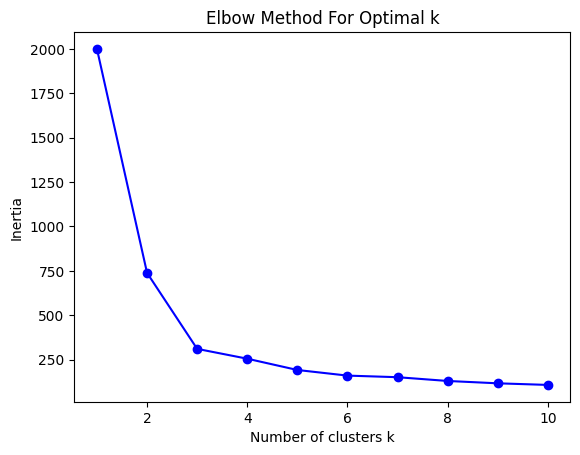

In [5]:
# TODO: Loop over k = 1 to 10, store inertia
inertias = []
K = range(1, 11)
for k in K:
    _, _, inertia = kmeans(X, k)
    inertias.append(inertia)


# TODO: Plot elbow graph
plt.plot(K, inertias, 'bo-')
plt.xlabel('Number of clusters k')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()


In [6]:
# TODO: Choose best k from elbow method
k_final = 3  # replace with your chosen k
clusters, centroids, _ = kmeans(X, k_final)

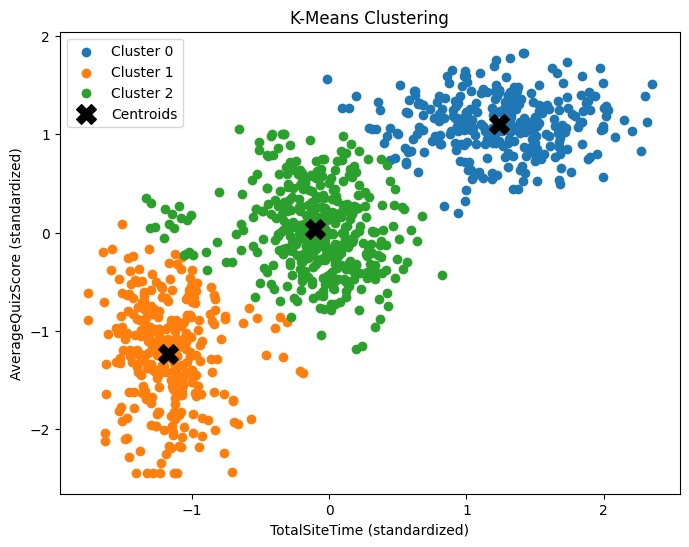

In [7]:
# TODO: Plot clusters
plt.figure(figsize=(8,6))
for i in range(k_final):
    plt.scatter(X[clusters == i, 0], X[clusters == i, 1], label=f'Cluster {i}')
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='black', marker='X', label='Centroids')
plt.xlabel('TotalSiteTime (standardized)')
plt.ylabel('AverageQuizScore (standardized)')
plt.title('K-Means Clustering')
plt.legend()
plt.show()


### Question

What value of k did you choose and why?

I chose k = 3 because the elbow plot showed a clear bend at k = 3, indicating that adding more clusters beyond this point does not significantly reduce inertia.